The question ask is who is making an over 50k per year. My hypothesis is whoever has a college level education and who has a their own business. To prove my hypothesis, I will perform EDA on the adult salary data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os

In [2]:
adult = pd.read_csv('adult.csv')

Before we go further, it is always good to have a look at the various columns and what kind of attributes are present in the data so that we could get a rough idea on how to begin with our EDA.

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Now based on the above result, we can classify the various data columns into numerical/categorical attributes:
1. Numerical Attributes: Age, FnlWgt, Education-num, Capital-Gain, Capital-Loss,  ours-Per-Week.
2. Categorical Attributes: WorkClass, Education, Marital-Status, Occupation, Relationship, Race, Sex, Native-Country, Income.

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There aren't any missing values but there are ? symbols there. 

In [6]:
adult.shape

(48842, 15)

In [7]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The statistics give us an idea about attributes containing missing values, the average value and maximum for a particular attribute, which are going to be very useful 

### Data Visualization

Visualizing attributes is perhaps the most important/interesting part of EDA. Anything in this world could be better understood if we have an image/visualization of it. But, we should always keep in mind whether the visualization is appropriate for the given data type. We shouldn’t just try out all the visualization techniques we know, and say we are done with EDA. Rather, we should do specific visualizations and make sure that we understand what the visualization is telling us.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F876C4BF70>,
      dtype=object)

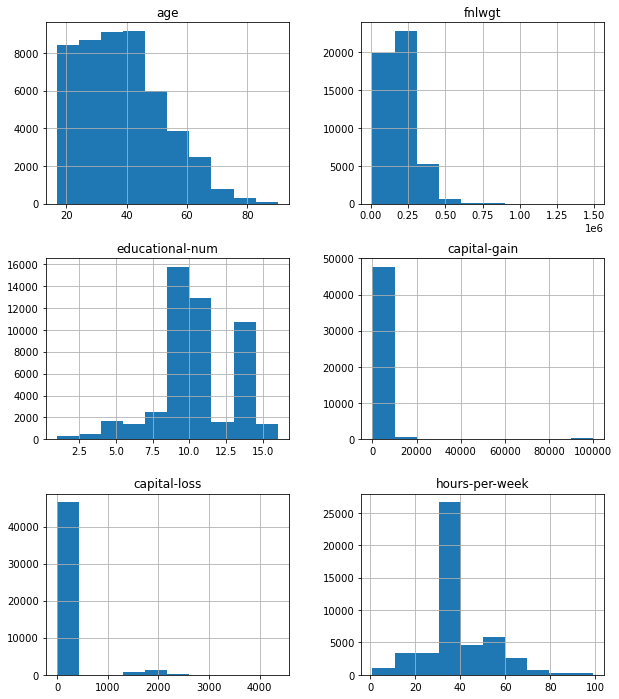

In [8]:
adult.hist(figsize = (10,12))

Most of the individuals have an age < 50 while the maximum age is around 90.
In general, people do not have investments other than their regular income. However, there are very few people who invest, and there are also a small number of outliers who earn more than 90000 via capital gains. However, among the people who had a, capital loss the average loss looks to be around 2000.
On average, most of the people have studied till education number 9 or 10 in the areas where the census was taken.
Most of the people work around 40 hrs per week. However there are a few who don’t work and a few who work for almost 100 hours a week.

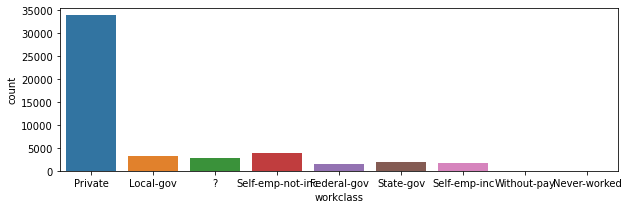

In [10]:
plt.figure(figsize = (10,3))
sns.countplot(data=adult, x = "workclass")

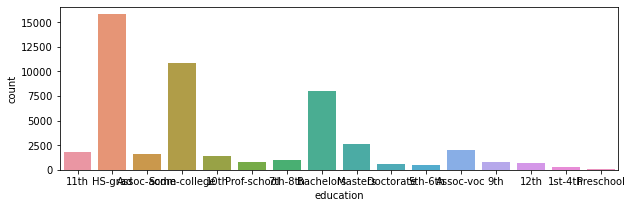

In [11]:
plt.figure(figsize = (10,3))
sns.countplot(data=adult, x = "education")

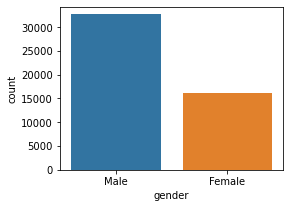

In [13]:
plt.figure(figsize = (4,3))
sns.countplot(data=adult, x = "gender")

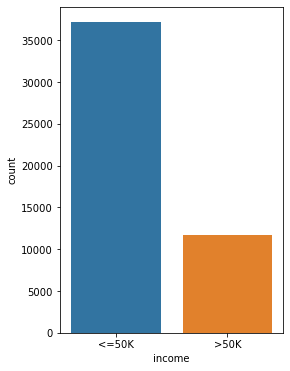

In [14]:
plt.figure(figsize = (4,6))
sns.countplot(data=adult, x = "income")

* Most of the people work in private sectors, and the rest are evenly distributed among state-gov, federal-gov, local-gov, self-emp-inc and self-emp-not-inc.
* Most of the people are high-school grads or have studied in some college. This is same as the education-num attribute, just that each of these values have been assigned a number there. We can use one of the two columns for our model, and ignore the other.
* Majority of the population according to the census data are male.
* Majority of the people have an income of less than 50k according to the data given, indicating that the data is somewhat skewed.




## Relationship between variables

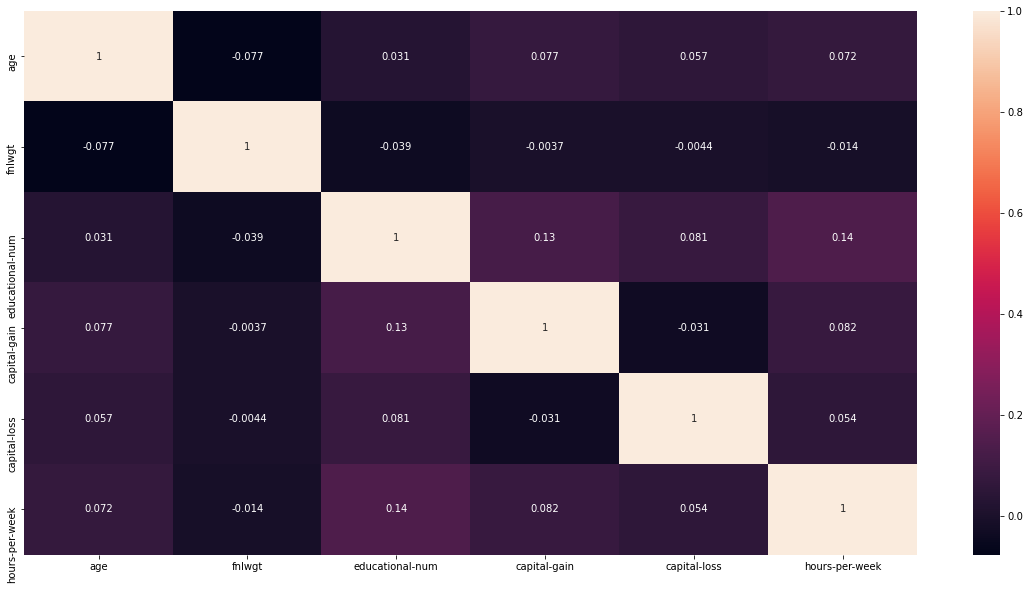

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(adult.corr(), annot=True)

We can see that there isn't great correlation between the numerical features. There is some correlation between age, hours per week and education-num according to the correlation heatmap.

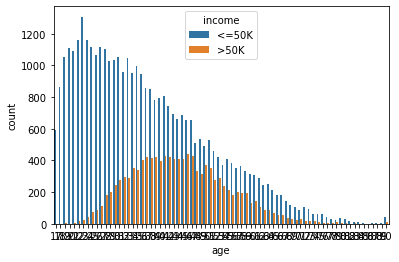

In [17]:
sns.countplot(x= 'age', hue = 'income', data =adult)

The above plot shows that experience matters to earn more income. More experienced people earn more than less experience people. This is true in the real world too. 

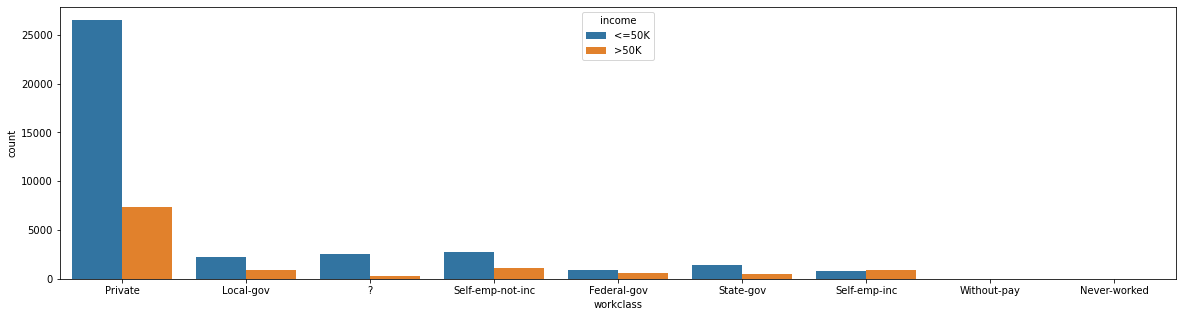

In [19]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x= 'workclass', hue = 'income', data =adult)

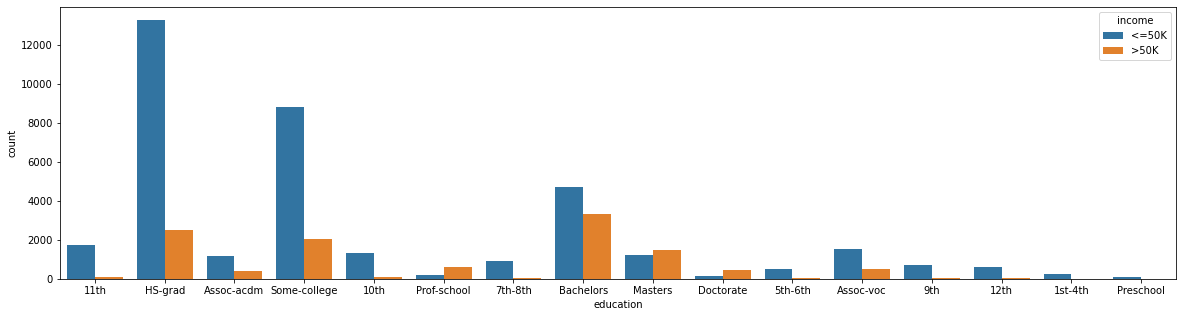

In [20]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x= 'education', hue = 'income', data =adult)

Clearly we can see that self-employed people in general make more money and people with higher education have a greater income. 

Next thing I love to see that performning a feature engineering and clear up the some features that didn't involve the predicting a salary. 